<a href="https://colab.research.google.com/github/mipypf/scej-mi/blob/develop/chapter11/scej_mi_chapter11_example_feature_rdkit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Google Colabの準備

#### 右上の「接続」をクリックし、ランタイムに接続

#### ライブラリをインストール

In [1]:
! pip install rdkit==2024.3.5

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.1/33.1 MB 18.8 MB/s eta 0:00:00


###有機材料の特徴量化

#### ①ライブラリの呼び出し

In [2]:
import pandas as pd
import numpy as np

from rdkit.Chem import AllChem, Draw, Descriptors
from rdkit import Chem, RDLogger

import warnings

warnings.filterwarnings("ignore")
RDLogger.DisableLog('rdApp.*')

####②対象のSMILESの定義及びROMolオブジェクトを作成

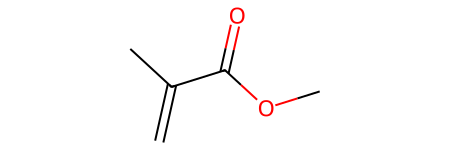

In [3]:
smiles = "CC(=C)C(=O)OC"  # メチルメタクリレート
mol = Chem.MolFromSmiles(smiles)
mol

#### ③ ROMolオブジェクトから分子記述子を作成

In [4]:
descriptor_names = [desc[0] for desc in Descriptors.descList]
descriptors =[[desc[1](mol) for desc in Descriptors.descList]]
descriptors_df = pd.DataFrame(descriptors, columns=descriptor_names, index=[smiles])
descriptors_df

,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
CC(=C)C(=O)OC,10.189815,10.189815,0.347222,-0.347222,0.358508,7.714286,100.117,92.053,100.052429,40,...,0,0,0,0,0,0,0,0,0,0


#### ③’ROMolオブジェクトからフィンガープリントを作成

In [5]:
fingerprint = [AllChem.GetMorganFingerprintAsBitVect(mol, radius=2, nBits=1024)]
fingerprint_df = pd.DataFrame(np.array(fingerprint, int))
fingerprint_df

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


### 実行環境の確認及び保存

In [6]:
!python3 -V

Python 3.11.12


In [7]:
!pip freeze > requirements_feature_rdkit.txt

In [8]:
from google.colab import files

files.download('requirements_feature_rdkit.txt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>